In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
dataset = pd.read_csv('diabetes.csv')

In [11]:
dataset.shape

(768, 9)

In [12]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
#check for null values
dataset.isnull().values.any()

False

In [14]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


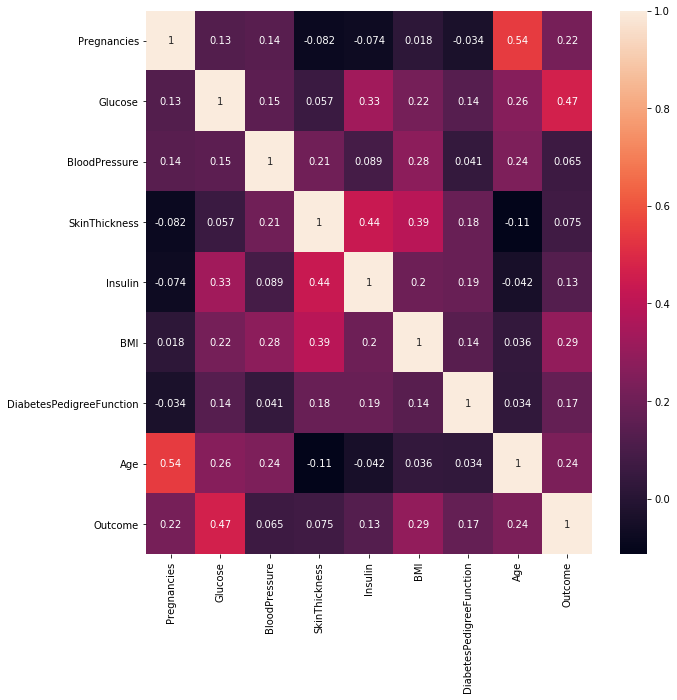

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset[dataset.corr().index].corr(),annot=True)

In [36]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [46]:
#Seperating dependent and independent variable from the dataset
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [47]:
#divide the dataset in training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [89]:
dataset.columns[:-1]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [91]:
for i in dataset.columns[:-1]:
    print('Number of zeros in ',i ,'=', len(dataset[dataset[str(i)]==0]))

Number of zeros in  Pregnancies = 111
Number of zeros in  Glucose = 5
Number of zeros in  BloodPressure = 35
Number of zeros in  SkinThickness = 227
Number of zeros in  Insulin = 374
Number of zeros in  BMI = 11
Number of zeros in  DiabetesPedigreeFunction = 0
Number of zeros in  Age = 0


In [103]:
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values= 0 ,strategy = 'mean' , axis=0)
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

In [121]:
#training the model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,random_state = 0)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [122]:
#predicting the result
y_pred = rfc.predict(X_test)
from sklearn import metrics
print('Accuracy = ', metrics.accuracy_score(y_test , y_pred))

Accuracy =  0.7662337662337663


In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[87, 16],
       [20, 31]])